## Natural Disasters in Japan

Japan is suffering a series of natural disasters recently. Floods, earthquakes, snows, etc...

#### Japan floods: At least 122 dead after heavy rain and landslides - CNN

https://www.cnn.com/2018/07/09/asia/japan-floods-intl/index.html

#### Japan floods: Death toll rises to 200 as UN offers assistance - CNN

https://www.cnn.com/2018/07/10/asia/japan-floods-intl/index.html

## Questions:

* Is Japan really safe?

* Are natural disasters increasing in Japan?

* What causes natural disasters?


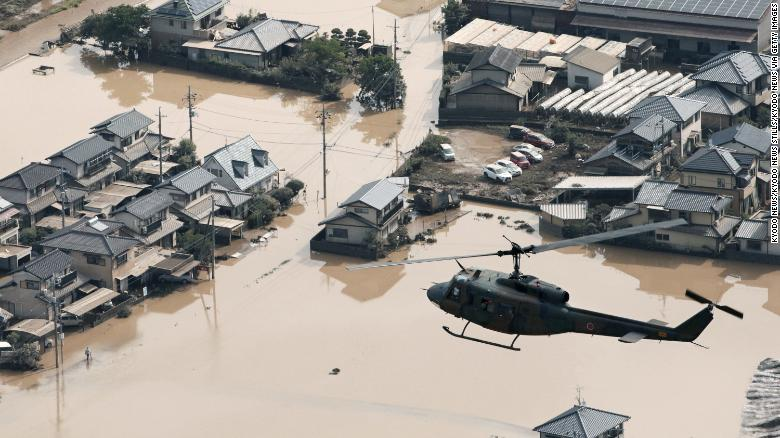

In [1]:
from IPython.display import Image
fig = Image(filename='180711095332-02-japan-flooding-0711-exlarge-169.jpg')
fig

## Dataset

Japan's Cabinet Office gathers data on natural disasters. It covers the data until 2017.

http://www.bousai.go.jp/kaigirep/hakusho/h30.html

In [2]:
import pandas as pd
import tabula

In [3]:
death_toll = tabula.read_pdf('H30_fuzokusiryo1.pdf', pages=14)
death_toll.head()

,年,風水害,地震・津波,火山,Unnamed: 4,雪害,Unnamed: 6,その他,Unnamed: 8,合計
0,平成5年,183,234,NaN,1,NaN,9,NaN,11,438
1,6,8,3,NaN,0,NaN,21,NaN,7,39
2,7,19,"6,437",NaN,4,NaN,14,NaN,8,"6,482"
3,8,21,0,NaN,0,NaN,28,NaN,35,84
4,9,51,0,NaN,0,NaN,16,NaN,4,71


In [4]:
death_toll = death_toll.dropna(axis='columns')
death_toll.columns = ['Year_JP', 'Flood', 'Earthquake', 'Volcano', 'Snow', 'Others', 'Total']
death_toll.head()

,Year_JP,Flood,Earthquake,Volcano,Snow,Others,Total
0,平成5年,183,234,1,9,11,438
1,6,8,3,0,21,7,39
2,7,19,"6,437",4,14,8,"6,482"
3,8,21,0,0,28,35,84
4,9,51,0,0,16,4,71


In [5]:
death_toll['Year_JP'] = death_toll['Year_JP'].str.extract('(\d\d*)')
death_toll['Earthquake'] = death_toll['Earthquake'].str.replace(',', '')
death_toll['Total'] = death_toll['Total'].str.replace(',', '')
death_toll.head()

,Year_JP,Flood,Earthquake,Volcano,Snow,Others,Total
0,5,183,234,1,9,11,438
1,6,8,3,0,21,7,39
2,7,19,6437,4,14,8,6482
3,8,21,0,0,28,35,84
4,9,51,0,0,16,4,71


In [6]:
death_toll = death_toll.astype(int)
death_toll['Year'] = death_toll['Year_JP'] + 1988
death_toll.to_csv('death_toll.csv', index=False)
death_toll.head()

,Year_JP,Flood,Earthquake,Volcano,Snow,Others,Total,Year
0,5,183,234,1,9,11,438,1993
1,6,8,3,0,21,7,39,1994
2,7,19,6437,4,14,8,6482,1995
3,8,21,0,0,28,35,84,1996
4,9,51,0,0,16,4,71,1997


In [7]:
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

In [8]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'axes.grid': True,
    'axes.prop_cycle': cycler('color', ['#01579B', '#B71C1C', '#827717', '#1B5E20', '#F57F17', '#4A148C', '#1B5E20']),
    'axes.edgecolor': '#ffffff',
    'xtick.major.size': 0,
    'xtick.minor.size': 0,
    'ytick.major.size': 0,
    'ytick.minor.size': 0,
    'legend.edgecolor': '#ffffff',
    'ps.fonttype': 42,
})

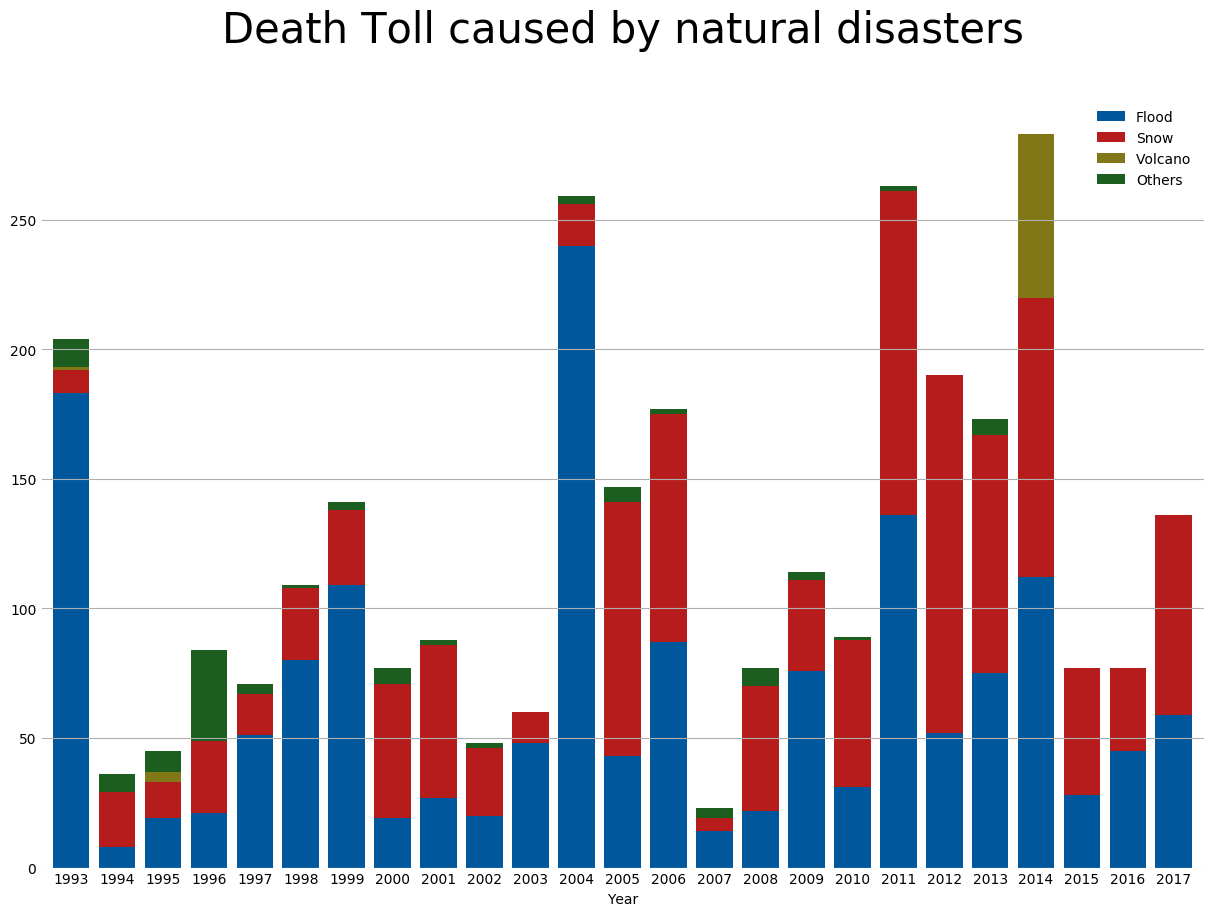

In [9]:
ax = death_toll[['Flood', 'Snow', 'Volcano', 'Others', 'Year']].plot(x='Year', kind='bar', figsize=(15,10), width=0.8, rot=0, stacked=True)
ax.set_title('Death Toll caused by natural disasters', pad=40)
ax.title.set_fontsize(30)
ax.grid(False, axis='x')
plt.show()

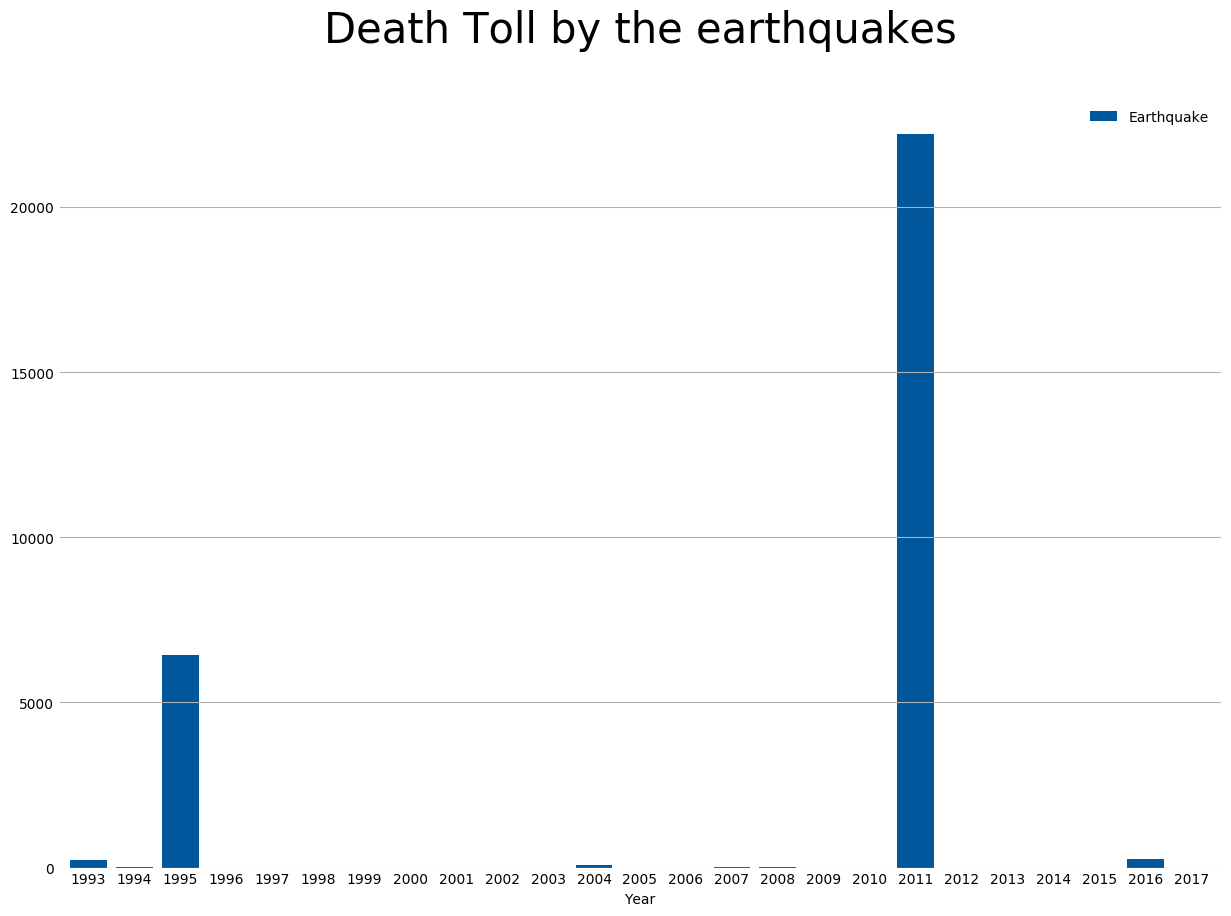

In [10]:
ax = death_toll[['Earthquake', 'Year']].plot(x='Year', kind='bar', figsize=(15,10), width=0.8, rot=0)
ax.set_title('Death Toll by the earthquakes', pad=40)
ax.title.set_fontsize(30)
ax.grid(False, axis='x')
plt.show()